In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Create a bar chart of the top 20 starting stations frequencies. Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?**

In [ ]:
# List of columns you want to read and load into the DataFrame
columns_to_read = ['start_station_name']  # Replace with the actual column names

# Read only the specified columns from the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Merged/Combined_DataWeatherFinal.csv', usecols=columns_to_read)


In [ ]:
# Setting the theme
sns.set_theme(style='whitegrid')

# Choose a palette for the plots
custom_palette = sns.color_palette("deep")
sns.set_palette(custom_palette)


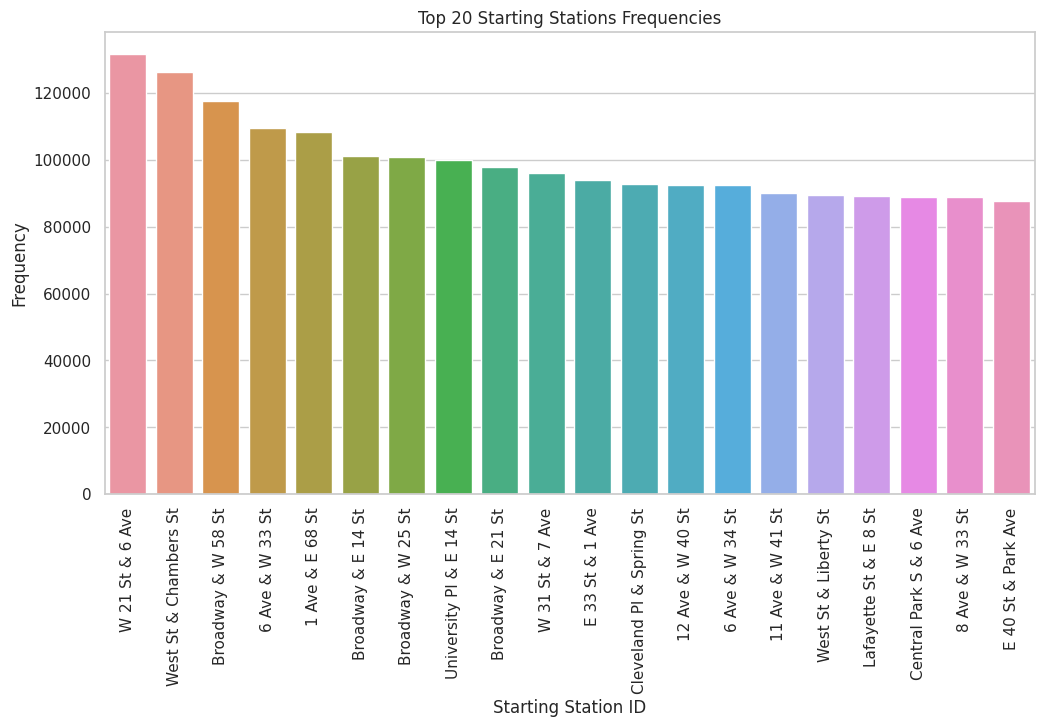

In [ ]:
# Calculate the frequency of each starting station
top_starting_stations = df['start_station_name'].value_counts().head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_starting_stations.index, y=top_starting_stations.values)
plt.xticks(rotation=90)
plt.xlabel('Starting Station ID')
plt.ylabel('Frequency')
plt.title('Top 20 Starting Stations Frequencies')
plt.show()


The default setting of the palette in Seaborn contains enough colors for many basic visualizations. Seaborn's default color palette is designed to be visually appealing and distinguishable, making it suitable for various types of plots, including scatter plots, line plots, bar charts, and more.

The default palette in Seaborn consists of ten colors that are chosen to be perceptually uniform and well-separated. This means that the colors are easily distinguishable by the human eye and can be used effectively to represent different categories or data groups in a plot.

For most cases, the default palette provides sufficient colors to represent up to ten distinct categories in a plot without causing confusion or ambiguity. However, if your plot requires more than ten colors to represent different groups or categories, you may consider using a different color palette or customizing the colors based on your specific needs.

**Recreate the dual-axis line plot from the previous Exercise using seaborn.**

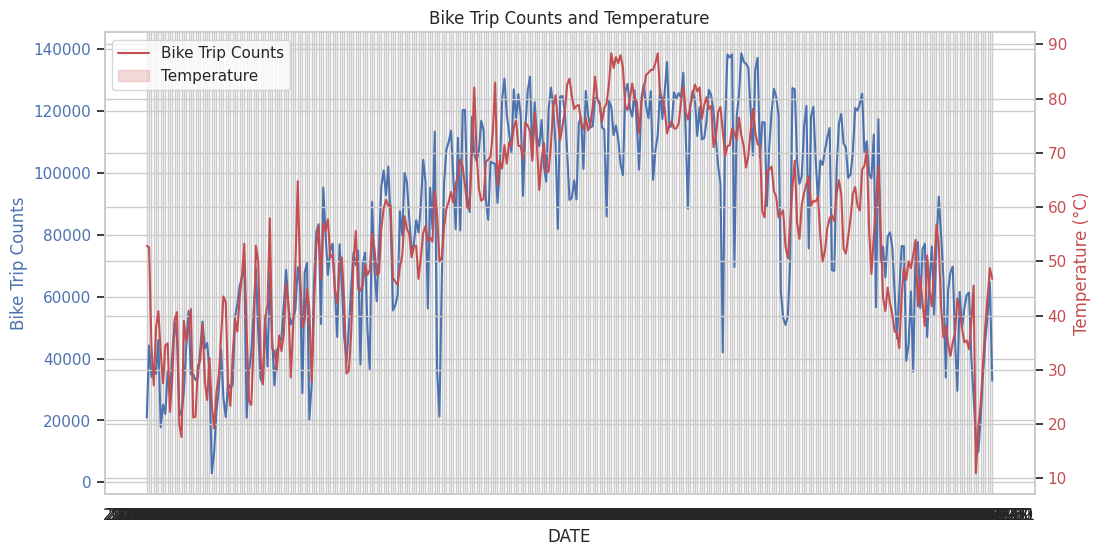

In [ ]:
merged_df=pd.read_csv("/content/drive/MyDrive/merged_weather_tripscount.csv")

# Step 3: Prepare the data for the line chart
# Convert temperature to Fahrenheit (if it's in Celsius)
merged_df['temperatures_F'] = (merged_df['TAVG'] * 9/5) + 32

# Set the Seaborn theme and style
sns.set_theme(style='whitegrid')
custom_palette = sns.color_palette("pastel")
sns.set_palette(custom_palette)

# Create the dual-axis line plot
plt.figure(figsize=(12, 6))

# Plot bike trip counts on the first axis (left)
sns.lineplot(x='DATE', y='trip_count', data=merged_df,  color='b')
plt.ylabel('Bike Trip Counts', color='b')
plt.tick_params(axis='y', labelcolor='b')

# Plot temperature on the second axis (right)
ax2 = plt.twinx()
sns.lineplot(x='DATE', y='temperatures_F', data=merged_df,  color='r')
plt.ylabel('Temperature (°F)', color='r')
plt.tick_params(axis='y', labelcolor='r')

plt.title('Bike Trip Counts and Temperature')
plt.xlabel('Date')
plt.legend(labels=['Bike Trip Counts', 'Temperature'], loc='upper left')

plt.show()


**Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.**

In [4]:
# List of columns you want to read and load into the DataFrame
columns_to_read = ['started_at', 'ended_at',"rideable_type"]  # Replace with the actual column names

# Read only the specified columns from the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Merged/Combined_DataWeatherFinal.csv', usecols=columns_to_read)


In [5]:
# Step 1: Convert start_datetime and end_datetime to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Step 2: Calculate the time difference between end_datetime and start_datetime
df['trip_duration'] = df['ended_at'] - df['started_at']

# Step 3: Extract the trip duration in the desired format (e.g., seconds, minutes, hours, etc.)

# Calculate trip duration in seconds
df['trip_duration_seconds'] = df['trip_duration'].dt.total_seconds()

# Calculate trip duration in minutes
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

# Calculate trip duration in hours
df['trip_duration_hours'] = df['trip_duration'].dt.total_seconds() / 3600

# You can choose the format that suits your analysis best

# Display the DataFrame with trip duration information
print(df[['started_at', 'ended_at', 'trip_duration', 'trip_duration_seconds', 'trip_duration_minutes', 'trip_duration_hours',"rideable_type"]])


                  started_at            ended_at   trip_duration  \
0        2022-12-05 17:47:32 2022-12-05 18:13:10 0 days 00:25:38   
1        2022-12-05 15:58:47 2022-12-05 16:02:10 0 days 00:03:23   
2        2022-12-05 07:27:12 2022-12-05 07:34:09 0 days 00:06:57   
3        2022-12-05 15:44:34 2022-12-05 16:13:23 0 days 00:28:49   
4        2022-12-05 18:16:26 2022-12-05 18:28:34 0 days 00:12:08   
...                      ...                 ...             ...   
30689916 2022-07-25 20:32:30 2022-07-25 20:44:12 0 days 00:11:42   
30689917 2022-07-25 09:22:29 2022-07-25 09:34:31 0 days 00:12:02   
30689918 2022-07-25 19:57:47 2022-07-25 20:19:00 0 days 00:21:13   
30689919 2022-07-25 11:54:16 2022-07-25 12:06:42 0 days 00:12:26   
30689920 2022-07-25 08:13:04 2022-07-25 08:58:29 0 days 00:45:25   

          trip_duration_seconds  trip_duration_minutes  trip_duration_hours  \
0                        1538.0              25.633333             0.427222   
1                        

In [ ]:
df.dtypes

rideable_type                     object
started_at                datetime64[ns]
ended_at                  datetime64[ns]
trip_duration            timedelta64[ns]
trip_duration_seconds            float64
trip_duration_minutes            float64
trip_duration_hours              float64
dtype: object

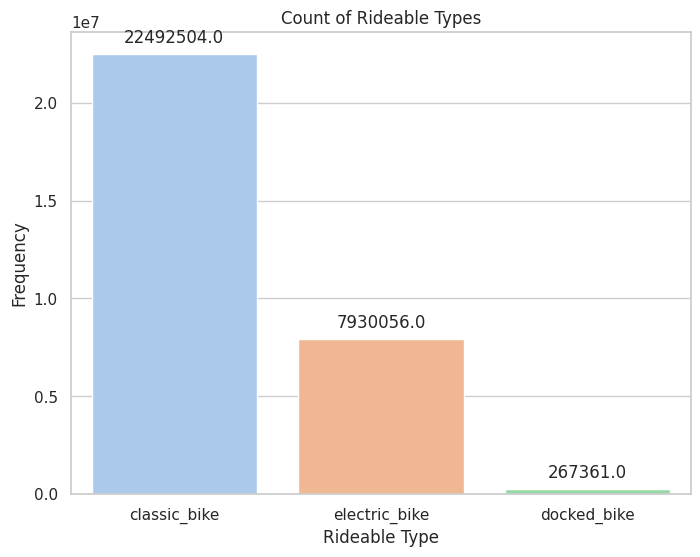

In [10]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme and style
sns.set_theme(style='whitegrid')
custom_palette = sns.color_palette("pastel")
sns.set_palette(custom_palette)

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rideable_type', data=df)

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', va='bottom')

plt.xlabel('Rideable Type')
plt.ylabel('Frequency')
plt.title('Count of Rideable Types')
plt.show()


In [ ]:
rideable_type_counts = df['rideable_type'].value_counts()

print(rideable_type_counts)

classic_bike     22492504
electric_bike     7930056
docked_bike        267361
Name: rideable_type, dtype: int64


**Inferences**

Box plot for **Rideable type** which is a categorical variable as there are three types of categories which are "Classic_bike", "Electric_bike", "docked_bike".

The output of Box plot suggests that the demand of classic bike is higher among the three which is 22492504 in number and then comes electric bike which is 7930056 and the last one is docked bike with 267361.

As we can also state that classic bike is nearly 74% out of the total bike which is running in new york city and 24% is electric bike and the remaining is docked bike.






**Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

#dtypes = {'end_station_id': 'object','start_station_id': 'object'}

# List of columns you want to read and load into the DataFrame
columns_to_read = ['rideable_type',"started_at","ended_at"]  # Replace with the actual column names

# Read only the specified columns from the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Merged/Combined_DataWeatherFinal.csv', usecols=columns_to_read)




In [8]:
df3 = df.copy()

# Step 1: Convert start_datetime and end_datetime to datetime objects
df3['started_at'] = pd.to_datetime(df3['started_at'])
df3['ended_at'] = pd.to_datetime(df3['ended_at'])

# Step 2: Calculate the time difference between end_datetime and start_datetime
df3['trip_duration'] = df3['ended_at'] - df3['started_at']

# Step 3: Extract the trip duration in the desired format (e.g., seconds, minutes, hours, etc.)

# Calculate trip duration in seconds
df3['trip_duration_seconds'] = df3['trip_duration'].dt.total_seconds()

# Calculate trip duration in minutes
df3['trip_duration_minutes'] = df3['trip_duration'].dt.total_seconds() / 60

# Calculate trip duration in hours
df3['trip_duration_hours'] = df3['trip_duration'].dt.total_seconds() / 3600

# You can choose the format that suits your analysis best

# Display the DataFrame with trip duration information
#print(df[['started_at', 'ended_at', 'trip_duration', 'trip_duration_seconds', 'trip_duration_minutes', 'trip_duration_hours',"rideable_type"]])




In [11]:
df3.head(2)

,rideable_type,started_at,ended_at,trip_duration,trip_duration_seconds,trip_duration_minutes,trip_duration_hours
0,classic_bike,2022-12-05 17:47:32,2022-12-05 18:13:10,0 days 00:25:38,1538.0,25.633333,0.427222
1,classic_bike,2022-12-05 15:58:47,2022-12-05 16:02:10,0 days 00:03:23,203.0,3.383333,0.056389


In [12]:
df4 = df3[["rideable_type","trip_duration"]]

In [13]:
df4.head(2)

,rideable_type,trip_duration
0,classic_bike,0 days 00:25:38
1,classic_bike,0 days 00:03:23


In [14]:
df4.to_csv("/content/drive/MyDrive/Merged/FacetGrid_data.csv")

In [ ]:
df4.head(2)

,rideable_type,trip_duration
0,classic_bike,0 days 00:25:38
1,classic_bike,0 days 00:03:23


In [22]:
df4=pd.read_csv("/content/drive/MyDrive/Merged/FacetGrid_data.csv")

Data is very large and it is consuming so much of time to create a Facegrid plot so rather than taking all the datapoints we have consider 1000000 random data points for our analysis

In [24]:
sample_size = 1000000
df5 = df4.sample(n=sample_size, random_state=42)

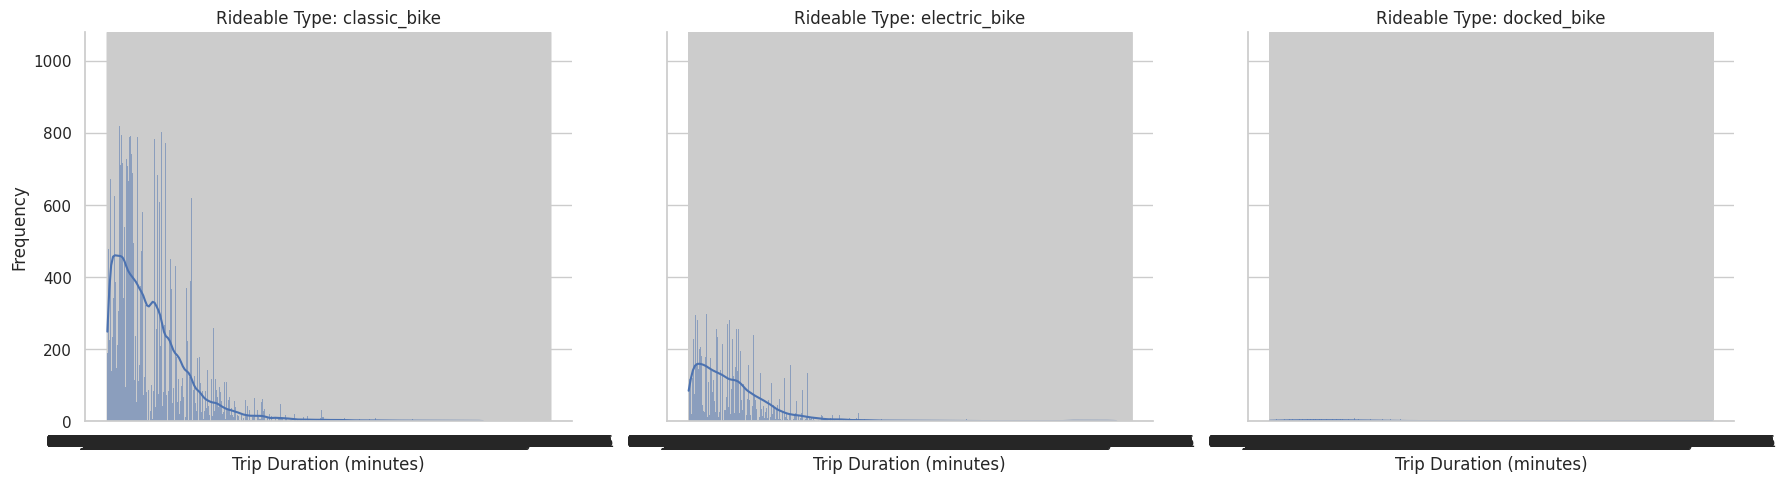

In [25]:
# Set the Seaborn theme and style
sns.set_theme(style='whitegrid')
custom_palette = sns.color_palette("pastel")
sns.set_palette(custom_palette)

# Create the FacetGrid using the Pandas DataFrame
g = sns.FacetGrid(data=df5, col='rideable_type', height=5, aspect=1.2)

# Plot histograms for trip durations for each rideable type
g.map(sns.histplot, 'trip_duration', kde=True, color='b')

# Set axis labels and titles
g.set_axis_labels('Trip Duration (minutes)', 'Frequency')
g.set_titles('Rideable Type: {col_name}')

# Show the FacetGrid
plt.show()

In [27]:
# Save the plot as an image file (e.g., PNG)
plt.savefig('/content/drive/MyDrive/Merged/Facetgrid_rideabletype_tripduration.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

The FacetGrid plot would be particularly useful in aiding the analysis questions in the project when we want to compare the distributions of a numeric variable across different categories. This can help us gain insights into how different groups behave or experience certain aspects of the data.

In the Citibike dataset project, we can utilize the FacetGrid plot to answer questions like:

Comparing Trip Durations by User Type: We can use the FacetGrid to create separate histograms of trip durations for each user type (Subscribers and Customers). This will allow us to observe differences in the distribution of trip durations between these two user groups.

Analyzing Bike Trip Counts by Rideable Type: The FacetGrid can be used to create histograms or line plots to show how the bike trip counts vary for different rideable types (e.g., "classic_bike" vs. "electric_bike"). This can help us understand the popularity of each rideable type over time.

Comparing Temperature by Seasons: By using the FacetGrid to create line plots of temperature over time, grouped by different seasons (e.g., Winter, Spring, Summer, Fall), we can analyze how the temperature changes with the seasons.

Frequency of Bike Trips by Day of Week: The FacetGrid can help us create bar plots to visualize the frequency of bike trips for each day of the week (Monday to Sunday), allowing us to identify any patterns or trends in bike usage throughout the week.

The FacetGrid allows us to view multiple visualizations side by side, making it easier to compare distributions across different categories. It enables us to perform exploratory data analysis efficiently, identify patterns, trends, and outliers, and draw valuable insights from the data.